#Actividad Semanal -- 6

Alumno: Evelyn Aylin Rendon Medina

Matricula: A01748750

Materia: Ciencia y Analítica de datos

Profesora: María de la Paz Rico Fernández

Fecha de entrega: 27 de octubre 2022

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y Reconstrucción
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposicion
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#TU CODIGO AQUI-------------------------------------
B= np.dot(np.dot(W,D),Winv)
#Sí, al reconstruir la matriz A por medio de la fórmula W*D*Winv y asignando el resultado en B,
#se obtienen los mismos valores enteros que se tenían previo a la descomposición
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [ ]:
#Se crea una función que utilizaré para descomponer y posteriormente reconstruir las tres matrices dadas para los ejercicios
#La función recibe un único parámetro, es es la matriz a procesar, la cual en este caso debe ser cuadrada
def descomposicion_reconstruccion(matrizCuadrada):
  print("-------Matriz original-------")
  #Se imprime la matriz original que se recibe para poder comparar de forma más sencilla
  print(matrizCuadrada)
  #Eigendescomposicion
  #Se obtiene los valores y vectores eigen a través del comando .eig(), donde requerimos de argumento la matrz de entrada
  #Los eigenvalores miden la variabilidad que permanece en los componentes (que será mayor en el primero), por lo cual
  #eigenvalores puede utilizarse para determinar la cantidad de componentes a conservar
  #Eigenvectores existen para las matrices cuadradas y son aquellos que, alk mutliplciarlos por dicha matriz, resultan el
  #mismo vector o en un m{ultiplo entero del mismo
  values, vectors = eig(matrizCuadrada)

  #Reconstrucción
  #Computamos los valores propios y vectores propios derechos de la matriz cuadrada de entrada
  values, vectors = np.linalg.eig(matrizCuadrada)
  #Asignamos los vectores resultantes del paso anterior a la variable W, que es la que se representa en la fórmula
  W = vectors 
  #Generamos el inverso de los vectores (guardados en W) a una nueva variable Winv 
  Winv = np.linalg.inv(W)
  #Obtenemos la diagonal de los eigenvalores
  D = np.diag(values)
  #Matriz reconstruida
  print("-------Matriz reconstruida-------")
  #Realizamos la multiplicación matricial para reconstruir la matriz, empleando el producto punto de np para ello
  #La multiplicación corresponde a la fórmula: W*D*Winv
  matrizReconstruida= np.dot(np.dot(W,D),Winv)
  #Retornamos el valor redondeado que se obtuvo en el paso anterior, es decir, la matriz reconstruida
  return matrizReconstruida.round()

In [ ]:
#Matriz 1
#Declaramos los valores dados para la matriz 1
A1= array([[3,0,2], [3,0,-2], [0,1,1]])
#Mandamos llamar la función comentada anteriomente, que nos imprime al matriz original
#Y también su reconstrucció, donde solamente pasamos de argumento la declarada A1
descomposicion_reconstruccion(A1)

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-------Matriz reconstruida-------


array([[ 3.+0.j,  0.-0.j,  2.-0.j],
       [ 3.-0.j,  0.+0.j, -2.+0.j],
       [ 0.+0.j,  1.-0.j,  1.+0.j]])

In [ ]:
#Matriz 2
#Declaramos los valores dados para la matriz 2
A2= array([[1,3,8], [2,0,0], [0,0,1]])
#Mandamos llamar la función comentada anteriomente, que nos imprime al matriz original
#Y también su reconstrucció, donde solamente pasamos de argumento la declarada A2
descomposicion_reconstruccion(A2)

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-------Matriz reconstruida-------


array([[1., 3., 8.],
       [2., 0., 0.],
       [0., 0., 1.]])

In [ ]:
#Matriz 3
#Declaramos los valores dados para la matriz 3
A3= array([[5,4,0], [1,0,1], [10,7,1]])
#Mandamos llamar la función comentada anteriomente, que nos imprime al matriz original
#Y también su reconstrucció, donde solamente pasamos de argumento la declarada A3
descomposicion_reconstruccion(A3)

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-------Matriz reconstruida-------


array([[ 5.,  4., -0.],
       [ 1., -0.,  1.],
       [10.,  7.,  1.]])

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


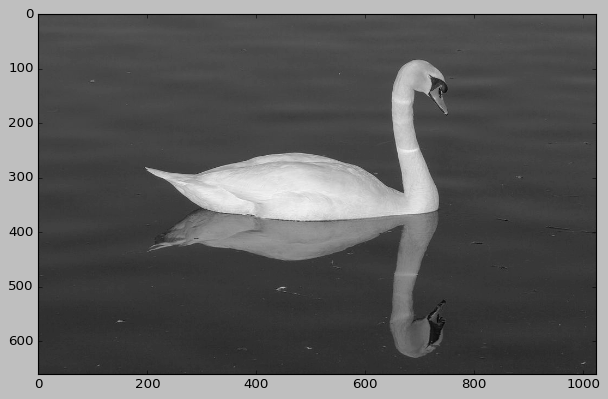

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F7AA2F482D0>


In [ ]:
#Importación de librerías
from six.moves import urllib #Obtener las imagenes a través de una liga
from PIL import Image #Importar la imagen proveniente de la liga
import matplotlib.pyplot as plt #Crear gráficas
import numpy as np #Estadísticas

#Definimos el estilo a utilizar en la gráfica
plt.style.use('classic') 
#Se abre la imagen, por medio de una solicitu hacia un sitio web (que contiene dicho archivo)
#Aunque en esta línea se modifica su color
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
#Se vuelve a modificar el color de la imagen, a escala de grises
imggray = img.convert('LA')
#Se obtiene un arreglo que contiene la intensidad de cada pixel dentro de la imagen
#es decir, la imagen expresada en términos numéricos
imgmat = np.array(list(imggray.getdata(band=0)),float)

#Se imprime la imagen
print(imgmat)

#Se obtienen las dimensiones de la image, se indexa el alto y ancho
imgmat.shape = (imggray.size[1],imggray.size[0])

#Se establece un tamño en la figura
plt.figure(figsize=(9,6))
#Indicamos que la figura se mostrará de acuerdo al color 'gray'
plt.imshow(imgmat,cmap='gray')
#Solicitamos finalmente que se muestre la gráfica con las modificaciones
#que se declararon anteriomente, como el tamño o color
plt.show()
#Imprimos información sobre la imagen, donde podemos ver, por ejemplo, 
#su tamaño o dimensiones
print(img)

In [ ]:
#Se genera la descomposición por valor singular, donde se obtienen los tres valores
#U,D,V solicitando esas mismas tres salidas al comando numpy.linalg.svd
U,D,V = np.linalg.svd(imgmat)
#Se imprimen las dimensiones de la imagen original
imgmat.shape


(660, 1024)

In [ ]:
#Se obtienen las dimensiones sel valor U, proveniente de las descomposición de la imagen
U.shape

(660, 660)

In [ ]:
#Se obtienen las dimensiones sel valor V, proveniente de las descomposición de la imagen
V.shape

(1024, 1024)

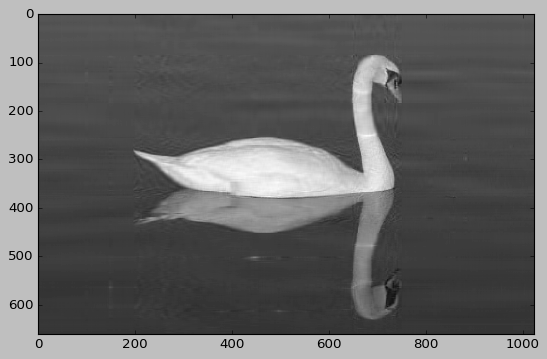

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 35
#------------------------------
#Se genera la reconstrucción de la imagen conforme la fórmula, introduciendo como variable a 
#nvalues, que es el valor que modificamos para hallar con cuántos valores singulares podemos
#trabajar sin que se pierda mucha calidad (variabilidad) en la imagen al comprimirla
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
#Se genera la impresión de la imagen reconstruida
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!
Comprime 3 imagenes

In [ ]:
#Función para crear ambas gráficas juntas
#De nuevo declaramos una función para mandarla llamar en cada imagen, ya que de tal forma el proceso puede
#verse de forma más limpia/clara, además que evitamos usar tantas veces el mismo código o muy similar
#Como argumentos de entrada para esta función necesitamos:
# -La liga, escrita entre comillas para acceder a la imagen. Ejemplo: 'https://imagen/sitioweb.jpg'
# -nvalue, definimos los valores singulares, con lo cual se modifican las dimensiones y calidad de las imagenes
def des_com(path, nvalue):
  #Se elige un estilo para la gráfica
  plt.style.use('classic')
  #Se abre la imagen que entra como argumento
  img = Image.open(urllib.request.urlopen(path))
  #Se convierte la imagen a escala de grises
  img2gray = img.convert('LA')
  #Se obtiene un arreglo que contiene un arreglo con la intesidad de los pixeles en la imagen (saturación)
  img2mat = np.array(list(img2gray.getdata(band=0)),float)
  #Se indexa el tamaño de la imagen para asignarlo
  img2mat.shape = (img2gray.size[1],img2gray.size[0])
  #Se establece el tamaño de la gráfica
  plt.figure(figsize=(12,9))
  #Indicamos el orden en que se va a crear una subfigura, que será lo que nos permita visualizar ambos resultados
  plt.subplot(211)
  #Se le asigna un título a la primera imagen, que es la original para poder diferenciarla
  plt.title('Imagen Original')
  #Mostramos finalmente la imagen original
  plt.imshow(img2mat,cmap='gray')
  #Imprimimos un texto que nos describe el comparativo que estamos realizando
  print('-'*8,'Comparativo entre imagen original y comprimida','-'*8)
  #Imprimimos información respecto a la imagen original, como pueden apreciarse sus dimensiones, lo cual nos 
  #ayudará a saber en qué rango se encuentra nvalue para comprimir la imagen
  print('Información imagen original:',img)
  #Singular Value Decomposition, cuyos valores se asignan en tres variables
  U,D,V = np.linalg.svd(img2mat)
  #Se reconstruye la imagen a través de la fórmula y los valores singulares
  reconstimg1 = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
  #Se indica la posición de la siguiente gráfica
  plt.subplot(212)
  #Asignamos el título correspondiente a la imagen comprimida
  plt.title('Imagen Comprimida')
  #Finalmente, mostramos la imagen reconstruida
  plt.imshow(reconstimg1,cmap='gray')
  #No necesitamos devolver un valor en específico, ya que las imagenes se imprimen en el proceso
  return None

-------- Comparativo entre imagen original y comprimida --------
Información imagen original: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x445 at 0x7F7AA205D190>


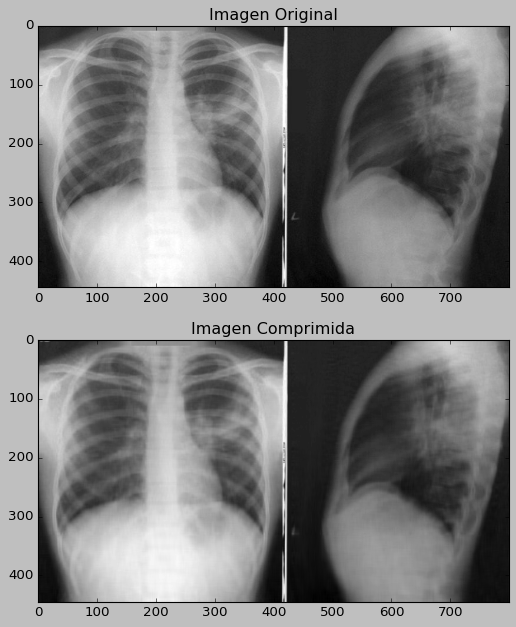

In [ ]:
#imagen 1

#Usamos la función definida anteriomente donde path='url'
#compresion(path, nvalue)

des_com('https://invdes.com.mx/wp-content/uploads/2020/03/01-04-20-radiografia-800x445.jpg', 
           45)
#Debido a que la imagen no requiere tantos detalles para entender su contenido,
#pudo utilizarse un nvalue de 45, sin perder mucha calidad en la imagen

-------- Comparativo entre imagen original y comprimida --------
Información imagen original: <PIL.PngImagePlugin.PngImageFile image mode=P size=1299x803 at 0x7F7AA1F7CAD0>


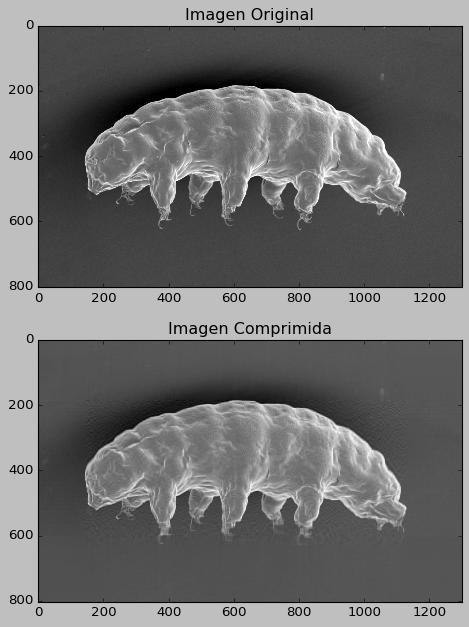

In [ ]:
#imagen 2
#Usamos la función definida anteriomente para comprimir la imagen
#Pasamos un url y un número entero para nvalues
des_com('https://d7lju56vlbdri.cloudfront.net/var/ezwebin_site/storage/images/_aliases/img_1col/noticias/el-genoma-del-tardigrado-desvela-un-escudo-contra-los-rayos-x/5788159-10-esl-MX/El-genoma-del-tardigrado-desvela-un-escudo-contra-los-rayos-X.png',
        65)
#Debido a los detalles en las patitas del osito de agua, para no perder tanta calidad
#en la compresión de la imagen, se utiliza un nvalue de 65, puesto que sí hay
#un cambio considerable entre 60 y no tanto entre 70

-------- Comparativo entre imagen original y comprimida --------
Información imagen original: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=536x322 at 0x7F7AA35FE610>


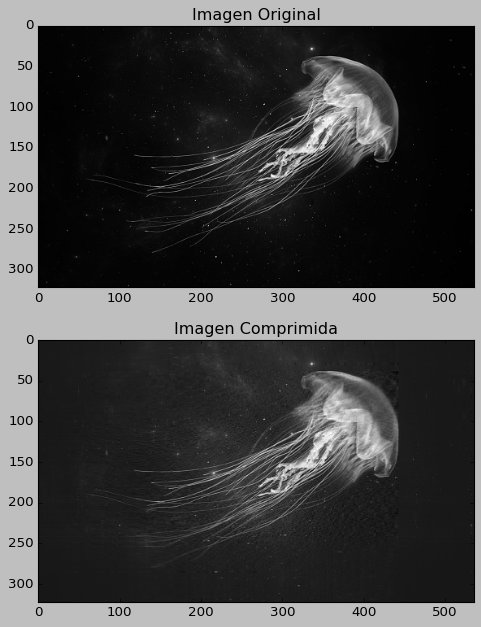

In [ ]:
#imagen 3
#Usamos la función definida anteriomente para comprimir la imagen
#Pasamos un url y un número entero para nvalues
des_com('https://media.istockphoto.com/photos/glowing-jellyfish-swim-deep-in-blue-sea-medusa-neon-jellyfish-fantasy-picture-id1357429850?b=1&k=20&m=1357429850&s=170667a&w=0&h=_Hulfe6Iie6AbK2bDknotjjLDijKHaYUkVquWy9SqMY=',
        85)
#Debido a que la imagen original en sí no es muy grande y los detalles de la medusa, 
#para no perder tanta calidad en la compresión se utiliza un nvalue de 85, puesto que sí hay
#un cambio considerable entre 80 y no tanto entre 90

-------- Comparativo entre imagen original y comprimida --------
Información imagen original: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x400 at 0x7F7AA334C910>


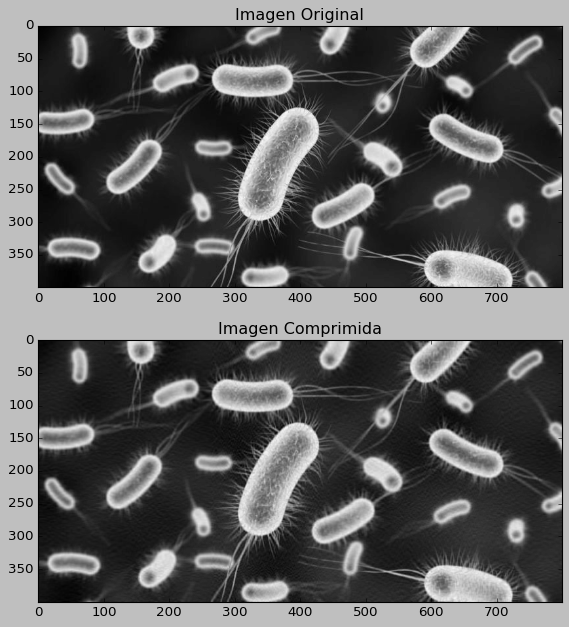

In [ ]:
#imagen 4
#Usamos la función definida anteriomente para comprimir la imagen
#Pasamos un url y un número entero para nvalues
des_com('https://humanidades.com/wp-content/uploads/2017/04/bacteria-6-e1567178265921.jpg',
        90)
#Debido a que la imagen original en sí no es muy grande y que el contenido tiene bastantes detalles, 
#para no perder tanta calidad en la compresión se utiliza un nvalue de 90, puesto que sí hay
#un cambio considerable entre 85 y no tanto entre 95

# Ejercicio 3

**Feature importances o importancia de las variables o características.**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e


Danos tus comentarios acerca de lo más relevante del ejercicio y que descubriste de las variables análizadas. Adjunta tu notebook y el link. 

In [ ]:
#tu codigo aqui
#Importamos las librerías necesarias
import numpy as np 
import matplotlib.pyplot as plt #Crear gráficas
from sklearn import datasets #Datasets
from sklearn.decomposition import PCA #Generar PCA 
import pandas as pd #dataframes
from sklearn.preprocessing import StandardScaler #Herramienta de escalado (normalización)
#Se define une stilo de gráfica
plt.style.use('ggplot')
#Cargamos la base de datos
iris = datasets.load_iris()
#Asignamos a X los datos
X = iris.data
#Asignamos a Y los datos objetivos
y = iris.target
#Guardamos nuestra herramiento para hacer un escalado estándar en una variable
scaler = StandardScaler()
#Implementamos el escalado en los datos que yacen en X
scaler.fit(X)
X = scaler.transform(X)
# Se comienza a generar el modelo de PCA
pca = PCA(n_components=2) #Se estiman solo 2 componentes para PCA
X_new = pca.fit_transform(X) #Se proyecta la información original en PCA

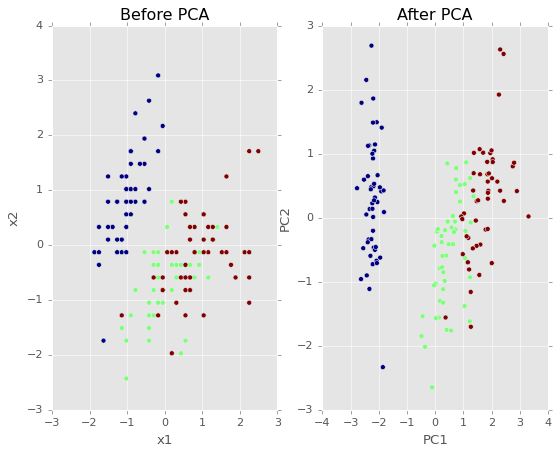

In [ ]:
#Se crea una gráfica para comparar los datos antes y después de aplicar PCA
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
#Creamos las etiquetas en los ejes
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
#Se asigna un título
axes[0].set_title('Before PCA')
#Se crea la segunda gráfica, basada en los datos que se les aplicó PCA
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
#Creamos las etiquetas en los ejes para los dos componentes
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
#Se asigna un título
axes[1].set_title('After PCA')
#Mostramos la gráfica con subgráficas
plt.show()

In [ ]:
#Se imprime la varianza para ambos componentes de PCA
#Podemos comprobar que es mayor para el primero
#Así como también que juntos explican el 95% de la varianza
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


In [ ]:
#Se probará que los valores propios de la matriz de covarianza original 
#son iguales a las varianzas del espacio reducido
#Se estima la matriz de covarianza del espacio reducido para
#visualizar la prueba de máxima varianza
np.cov(X_new.T)
array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])
#Se observa que dichos valores (donde las varianzas yacen en la diagonal) 
#son iguales a los valores propios reales de la covarianza

array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

In [ ]:
#los valores propios reales de la covarianza se encuentran en:
pca.explained_variance_
array([2.93808505, 0.9201649 ])

array([2.93808505, 0.9201649 ])

In [ ]:
#Se buscarán las características más importantes, donde:
#La importancia de cada característica puede ser observada en la magnitud de 
#sus valores en los vectores propios, de forma que, --mayor magnitud, mayor importancia--
#Primero imprimos los componentes en pca
print(abs( pca.components_ ))
#Los componentes en PCA se distribuyen de la siguiente forma:
#[n_components, n_features]
#Por lo que viendo la primera fila, podemos observar que las características 1,3,4 son
#las más importantes para el componente 1 de PCA, es decir, PC1 [[0.52106591 0.26934744 0.5804131  0.56485654]
#De igual forma, para el segundo componente, la característica más importante sesría la segunda  [0.37741762 0.92329566 0.02449161 0.06694199]]
#Pues como se dijo anteriormente, a mayor magnitud, mayor importancia

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [ ]:
#El tutorial nos comenta que un gráfico biplot es la mejor manera para visualizar
#oda la información en uno, lo resultante de realizar PCA
#Biplot crea un diagrama de dispersión multivariable
#Para crear la gráfica se define una función que recibe tres parámetros
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # Proyección en PC1
    ys = score[:,1] # Proyección en PC2
    n = coeff.shape[0] # Número de variables
    #Se determina el tamaño de la figura o gráfica
    plt.figure(figsize=(10,8), dpi=100)
    #Se asignan las clases
    classes = np.unique(y)
    #Se definen los colores y marcadores a utilizar
    colors = ['g','r','y']
    markers=['o','^','x']
    #Se implementa un ciclo for para recorrer las clases
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) #donde el color se basa en el grupo
    for i in range(n):
        #Se traza omo flechas las puntuaciones de las variables (cada variable tiene una puntuación para PC1 y otra para PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)
#Se creab las etiquetas para los ejes x,y. También se asigna un tamaño
    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    #Se modifican los límites d ela gráfica para los ejes
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    #Se genera la cuadrícula
    plt.grid()
    #Se cambia la apariencia de los 'tick'
    plt.tick_params(axis='both', which='both', labelsize=14)

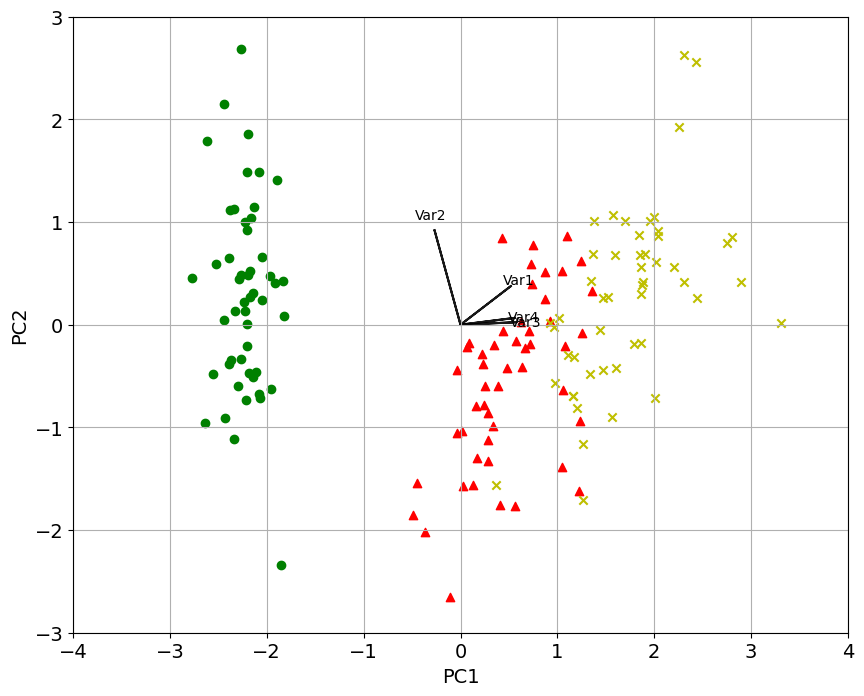

In [ ]:
import matplotlib as mpl #Importamos mpl de la librería de matplotlib
mpl.rcParams.update(mpl.rcParamsDefault) #Se reinicia el estilo a los valores predeterminados
#Se manda llamar la función definida anteriomente para crear la gráfica de los dos primeros componentes
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
#Se muestra la gráfica
plt.show()

In [ ]:
#De la gráfica podemos visualizar algunos aspectos:
#Efectivamente, se ha maximizado la varianza
#Como se encontró anteriormente, las características 1,3 y 4 son las más relevantes,
#con mayor variabilidad para PC1
#De igual forma, la característica 2 es la más importante para PC2
#Las flechas (variables/características) que apuntan en la misma dirección indican 
#correlación entre las variables que representan
#las que apuntan en direcciones opuestas indican un contraste

#La variable 3 y 4 tienen una correlación extremadamente positiva
print('Correlacion entre Var 3-4:',np.corrcoef(X[:,2], X[:,3])[1,0])
#La variable 2 y 3 están relativamente correlacionadas de forma negativa
print('Correlacion entre Var 2-3:',np.corrcoef(X[:,1], X[:,2])[1,0])

Correlacion entre Var 3-4: 0.9628654314027957
Correlacion entre Var 2-3: -0.42844010433054014


### Preguntas

**Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.**

Considero que los pasos realizados en el proceso de features importances fueron muy amigables, pues empezamos desde cero, lo cual sin duda ayuda a digerir mejor la información y la metodología aplicada. Además, se incluyen gráficas que hacían el contenido más ameno, cuya interpretación resultó más sencilla y, lógicamente, ilustrativa.

**¿Qué es feature importance y para que nos sirve?**

La importancia de una característica tiene que ver directamente con su magnitud, es decir, si observamos que una de ellas posee gran magnitud, significa que es igual de importante y con el concepto ‘importante’ nos referimos a que son las que tienen mayor influencia en los componentes que surgen al implementar PCA. Explicado en otras palabras, conocer la importancia de una característica nos ayuda a explicar qué elemento explica la mayor variabilidad en cada componente.

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

Considero que el hallazgo más relevante que surgió en el desarrollo del ejercicio fue la comprobación en Python respecto a que los valores propios de la matriz de covarianza original son iguales a las varianzas del espacio reducido, pues nos ayuda a respaldar y entender mejor teoría. Asimismo, también fue muy relevante el resultado gráfico obtenido para demostrar el contraste de los datos antes y después de PCA, como también el análisis en la importancia de las características. 

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

En sí PCA es aplicable para los modelos de aprendizaje, pues nos ayuda a disminuir la dimensionalidad de nuestros datos (que a su vez hace más rápida su computación), manteniendo casi toda la variabilidad, además que podemos ajustar qué tanta estamos dispuestos a sacrificar. Por tanto, como menciono, dicho conocimiento respecto a PCA, ya sea en contexto teórico o su aplicabilidad me resultaría útil para trabajar con datos, como podría ser, precisamente al entrenar modelos de aprendizaje automático, al eliminar ruido, para visualiza y comprimir los datos, como fue el caso de las imágenes en ejercicio dos de la práctica. De igual forma cabe destacar que la relevancia de las características tiene relación con PCA, ya que surgen del producto escalar de los datos originales en el espacio PCA reducido, por lo que su importancia y utilidad van relacionadas.

# Referencias

- StatQuest with Josh Starmer (2018, abril). StatQuest: Principal Component analysis (PCA), Step-by-Step [Archivo de video]. Youtube. https://www.youtube.com/watch?v=FgakZw6K1QQ
- Serafeim, L. (2020, mayo). PCA clearly explained —When, Why, How to use it and feature
importance: A guide in Python. Retrieved from Towards Data Science:
https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-featureimportance-a-guide-in-python-7c274582c37e
- pcp, (2021, diciembre), Data Reduction in Data Mining, Geek forgeeks: https://www.geeksforgeeks.org/data-reduction-in-data-mining/?id=discuss